In [1]:
import numpy as np
from hmmlearn import hmm
from graphviz import Digraph

In [2]:
def makeMultinomialHMMGraph(model, precision=0):
    """Creates a graphviz-Digraph from a hmmlearn-MultinomialHMM.
        
        model -- the hmmlearn model
        precision -- floating point precision for displaying edge-label and edges
            if precision == 0, no adjustment will be done
        
    """
    # calculate precision stuff
    if precision == 0:
        tolerance = 0
        fmtstr = "{:}"
    else:
        tolerance = 10**(-precision)
        fmtstr = "{:."+str(precision)+"f}"
    
    # main graph
    g = Digraph('Graph')

    # subgraphs: start node, components, features
    gs = Digraph('cluster_0')
    gs.body.append('color=white')
    gs.attr('node', shape='box')

    gc = Digraph('cluster_1')
    gc.body.append('color=white')

    gf = Digraph('cluster_2')
    gf.body.append('color=white')
    gf.attr('node', shape='doublecircle')

    # append nodes to subgraphs
    gs.node("start")
    for n in range(model.n_components):
        gc.node("c"+str(n))
    for n in range(model.n_features):
        gf.node("f"+str(n))

    # add subgraphs to main graph
    g.subgraph(gs)
    g.subgraph(gc)
    g.subgraph(gf)
    
    # draw edges from start node
    for n in range(model.n_components):
        p = model.startprob_[n]
        if p > tolerance:
            g.edge("start", "c"+str(n), label=fmtstr.format(p))
            
    # draw edges between components
    for n1 in range(model.n_components):
        for n2 in range(model.n_components):
            p = model.transmat_[n1,n2]
            if p > tolerance:
                g.edge("c"+str(n1), "c"+str(n2), label=fmtstr.format(p))
                
    # draw edges from components to features
    for n1 in range(model.n_components):
        for n2 in range(model.n_features):
            p = model.emissionprob_[n1,n2]
            if p > tolerance:
                g.edge("c"+str(n1), "f"+str(n2), label=fmtstr.format(p))
                
    # return graph
    return g

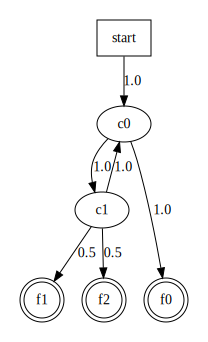

In [3]:
model = hmm.MultinomialHMM(n_components=2)
model.n_features = 3
model.transmat_ = np.array([[0.0, 1.0],
                           [1.0, 0.0]])
model.startprob_ = np.array([1.0, 0.0])
model.emissionprob_ = np.array([[1.0, 0.0, 0.0],
                               [0.0, 0.5, 0.5]])
makeMultinomialHMMGraph(model, precision=1)